In [99]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [110]:
image = cv2.imread(r"D:\Malathi\ART\painting\1630783619_51-oir-mobi-p-zheltaya-chainaya-roza-tsveti-krasivo-foto-57.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, c = image.shape

In [111]:
# Nearest-neighbor interpolation
nni = cv2.resize(image, (w//9, h//9), interpolation=cv2.INTER_NEAREST)

# Bilinear interpolation
bli = cv2.resize(image, (w//9, h//9), interpolation=cv2.INTER_LINEAR)

# Bicubic interpolation
bci = cv2.resize(image, (w//9, h//9), interpolation=cv2.INTER_CUBIC)

# Area-based interpolation
abi = cv2.resize(image, (w//9, h//9), interpolation=cv2.INTER_AREA)

# Lanczos interpolation
lci = cv2.resize(image, (w//9, h//9), interpolation=cv2.INTER_LANCZOS4)


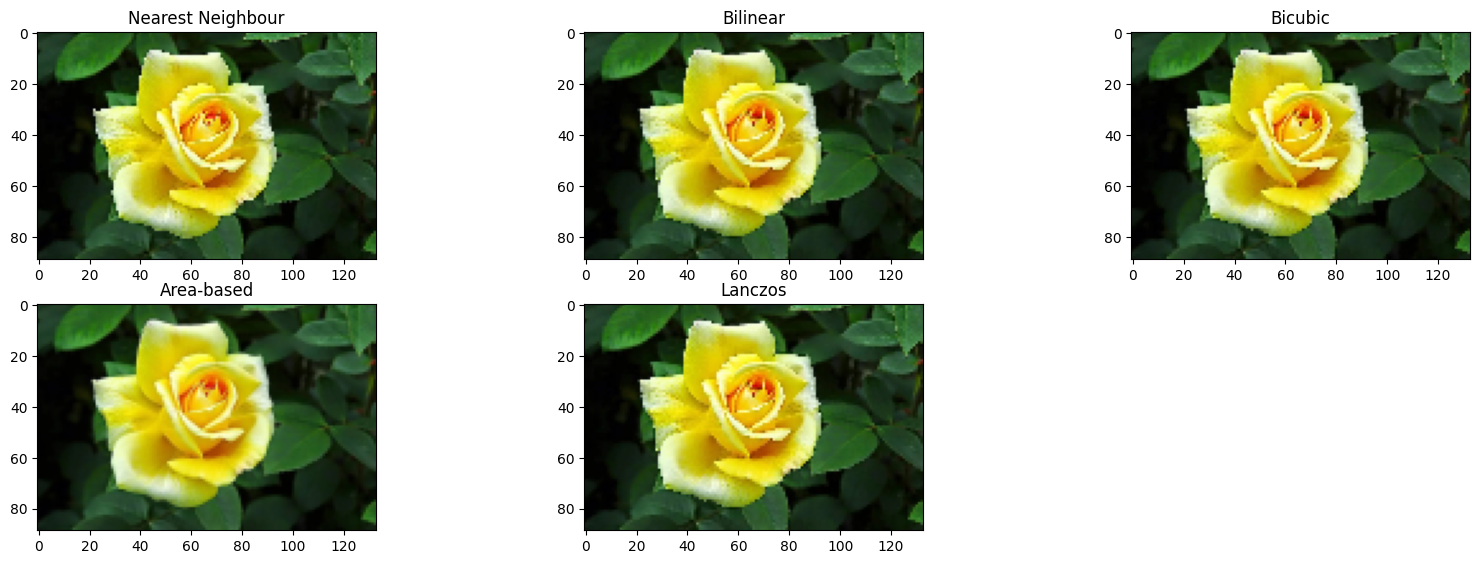

In [112]:
Titles =["Nearest Neighbour", "Bilinear", "Bicubic", "Area-based", "Lanczos"]
images =[nni, bli, bci, abi, lci]
count = 5
 
fig = plt.figure(figsize=(20, 10))

for i in range(count):
    plt.subplot(3,3, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
plt.show()

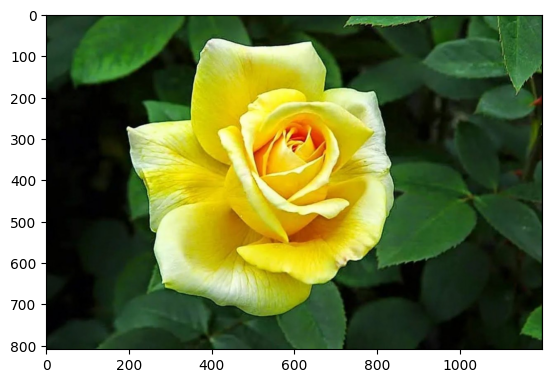

In [113]:
image = cv2.imread(r"D:\Malathi\ART\painting\1630783619_51-oir-mobi-p-zheltaya-chainaya-roza-tsveti-krasivo-foto-57.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
# image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# image to RGB
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# image to a different data type (e.g., from 8-bit unsigned integer to 32-bit float)
float_image = image.astype(np.float32)

# image to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


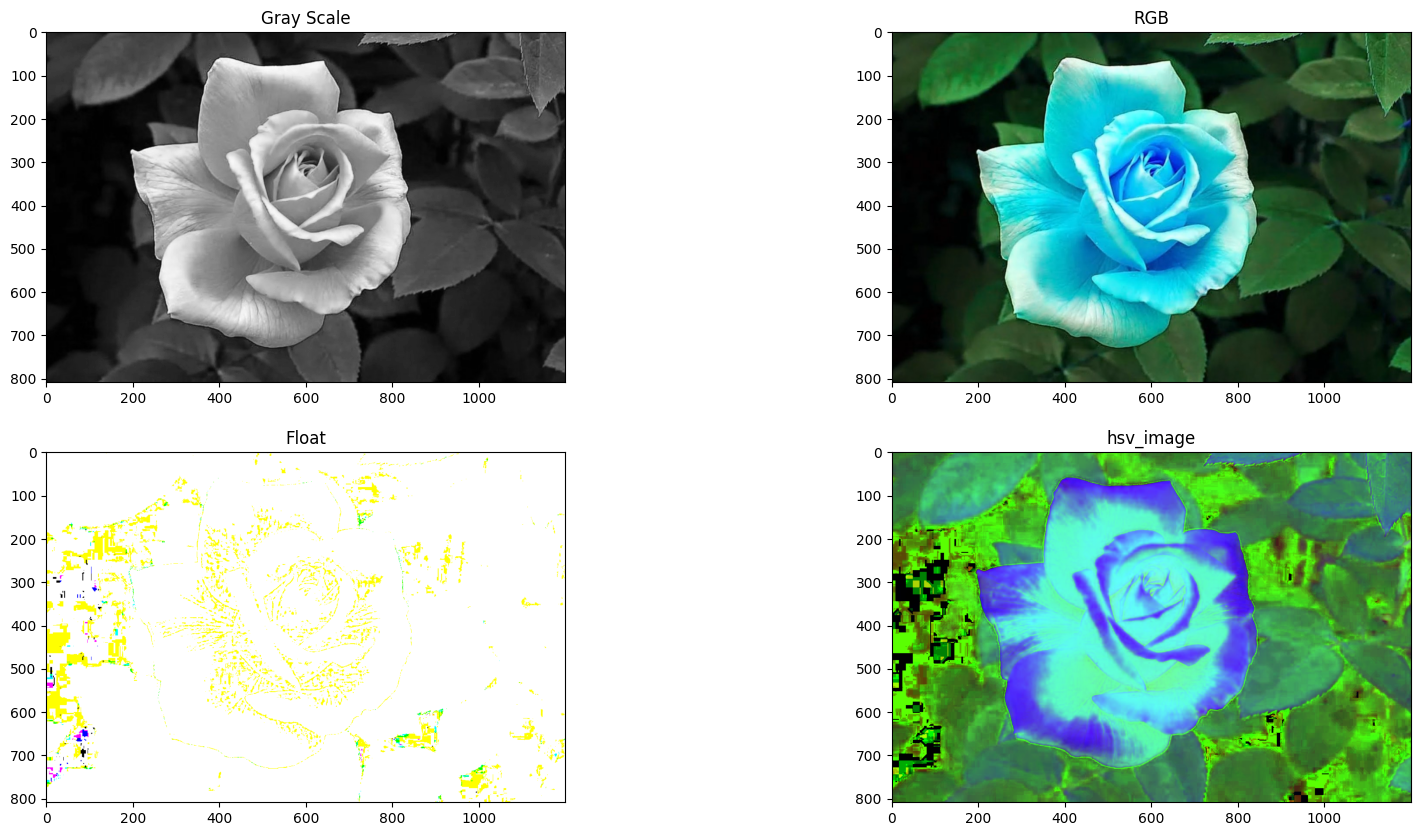

In [114]:

Titles =["Gray Scale", "RGB", "Float", "hsv_image"]
images =[gray_image, rgb_image, float_image, hsv_image]
count = 4
 
fig = plt.figure(figsize=(20, 10))

for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i], cmap='gray')
plt.show()

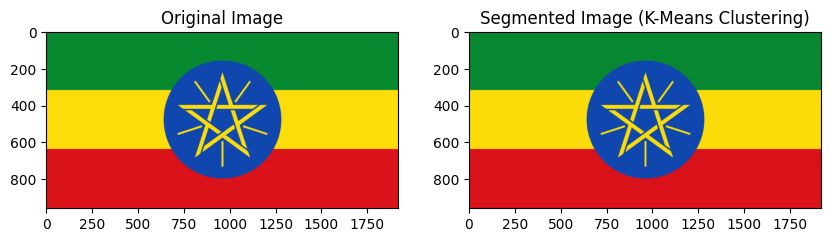

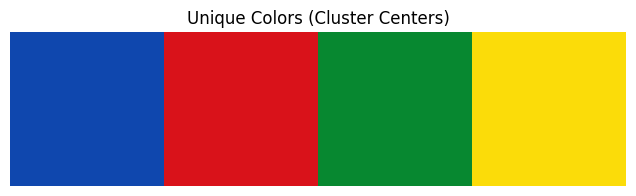

In [131]:
# Read an image from file
image = cv2.imread(r"D:\Malathi\SEM_6\IVP\Flag_of_Ethiopia.jpg")

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = image_rgb.reshape((-1, 3))

# Perform k-means clustering
num_clusters = 4 # You can adjust this value based on your requirement
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(pixels)

# Get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Assign each pixel to its corresponding cluster center
segmented_image = centers[labels].reshape(image_rgb.shape)

# Display the original image and the segmented image
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(122)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Segmented Image (K-Means Clustering)')

plt.show()

# Display the unique colors in a separate plot
plt.figure(figsize=(8, 2))
plt.imshow([centers.astype(np.uint8)])
plt.title('Unique Colors (Cluster Centers)')
plt.axis('off')
plt.show()
